# Introduction
In today's rapidly evolving real estate market, data-driven insights are crucial for understanding property trends and making informed decisions. Our project focuses on analyzing a comprehensive dataset of real estate properties from various regions in Yerevan, Armenia. This dataset includes detailed information on 4,590 properties, encompassing key attributes such as location, building type, number of rooms, area, floor level, renovation status, and pricing.

The primary objective of our analysis is to uncover patterns and trends within the real estate market, providing valuable insights that can assist both buyers and sellers in making more informed decisions. By examining factors such as the impact of location on property prices, the correlation between building types and market demand, and the influence of renovation status on property value, our study aims to contribute to a better understanding of the Yerevan real estate landscape.

Through this project, we hope to demonstrate the power of data analytics in the real estate sector, showcasing how detailed data analysis can lead to more accurate pricing strategies and better market predictions.

We studied a number of websites of the Real Estate Agency ([real-estate.am](https://www.real-estate.am/hy/), [akcern.am](https://akcern.am/), [tun.am](https://tun.am/am/), [Senyak.am](https://banali.am/vachark?is_developer=true&page=1&state=1) ,[Banali.am](https://banali.am/vachark?is_developer=true&page=1&state=1), [goldenhouse.am](http://goldenhouse.am/), [ararat-realty.am](https://ararat-realty.com/hy/), etc.) but we used 2 websites [Senyak.am](https://banali.am/vachark?is_developer=true&page=1&state=1) ,[Banali.am](https://banali.am/vachark?is_developer=true&page=1&state=1)

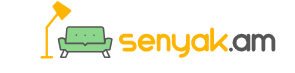
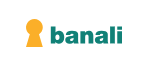

For work we used the following libraries`

selenium, time, csv, pandas, seaborn, matplotlib.pyplot, sklearn.preprocessing

# Dataset Overview
This dataset consists of 4,590 entries and 7 columns, each representing various attributes related to real estate properties.

# Columns


1.   Տարածաշրջան (Region): This column contains the location of each property, including both the city and district.

2.   Շինության տիպ (Building Type): Describes the type of building, such as "Քարե" (Stone), "Մոնոլիտ" (Monolith), or "Պանելային" (Panel).
3. Սենյակներ (Rooms): Indicates the number of rooms in each property.
4. Մակերես (Area): Provides the size of the property in square meters.
5. Հարկ (Floor): Specifies the floor number on which the property is located.
6. Վերանորոգում (Renovation): Describes the condition or renovation status of the property, such as "Կապիտալ" (Capital renovation) or "Պետական վիճակ" (State condition).
7. Գինը (Price): Lists the price of the property, originally including a dollar sign.

# Data Types and Missing Values

*   All columns contain complete data with no missing values.
*   The data types vary: "Մակերես" (Area) and "Հարկ" (Floor) are stored as integers, while the rest are stored as objects (strings).

# Import Required Libraries

In [32]:
import os
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from selenium.webdriver.common.keys import Keys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1.Data Collection (web scraping)

This script automates the extraction of property details from Senyak.am and Banali.am using Selenium WebDriver. It navigates through multiple listings, capturing data such as location, building type, room count, area, floor, renovation status, and price. Prices are adjusted with a conversion factor. The script handles pagination and ensures accurate data collection with built-in error handling.

In [ ]:
value = 390
driver = webdriver.Chrome()
# -----------------------------------Senyak.am-----------------------------------------------
try:
    driver.get(url = "https://www.senyak.am/")
    time.sleep(2)
    driver.find_element(By.CSS_SELECTOR, "#responsive > li:nth-child(1) > a").click()
    time.sleep(1)
    driver.find_element(By.CSS_SELECTOR, "#titlebar > div > div.row.text-center.big-block > div.col-md-20-percent.col-xs-100-percent.padding-top-10.padding-bottom-10").click()
    time.sleep(3)
    info = [["Տարածաշրջան", "Շինության տիպ", "Սենյակներ", "Մակերես", "Հարկ", "Վերանորոգում" , "Գինը"]]
    for i in range(171, 201):
        for j in range(1, 44):
            try:
                new_list = []
                driver.find_element(By.CSS_SELECTOR, f"#propListContainer > article:nth-child({j}) > div > div > div.listing-title > h2 > a").click()
                time.sleep(1)
                for l in range(1 , 8):
                    try:
                        if l == 6:
                            continue
                        content = driver.find_element(By.CSS_SELECTOR, f"#wrapper > main > div:nth-child(1) > div > div > div.col-lg-4.col-md-5 > table > tbody > tr:nth-child({l}) > td").text
                        time.sleep(2)
                        if content[-1] == "²":
                            content = content[:-2]
                        if "/" in content:
                            content = content.split("/")[0]
                        new_list.append(content)
                        time.sleep(2)
                    except:
                        continue
                try:
                    try:
                        price = driver.find_element(By.CSS_SELECTOR , "#wrapper > main > div:nth-child(1) > div.container > div > div.col-lg-4.col-md-5 > div.h3.text-right.margin-top-0 > span").text
                    except:
                        price = driver.find_element(By.CSS_SELECTOR , "#wrapper > main > div:nth-child(1) > div.container > div > div.col-lg-4.col-md-5 > div.h3.text-right.margin-top-0").text
                except:
                    continue
                price = price.replace(" " , "")
                if len(price) > 7 and price[0].isdigit() == False:
                    price = float(int(str(price[1:]))/value)
                    price = "$" + price
                elif len(price) > 7 and price[-1].isdigit() == False:
                    price = float(int(str(price[:-1]))/value)
                    price = "$" + price
                new_list.append(str(price))
                if len(new_list) == 7:
                    info.append(new_list)
                driver.back()
                time.sleep(1)
            except:
                if i == 43:
                    break
                else:
                    continue
        time.sleep(3)
        driver.find_element(By.CSS_SELECTOR, "#paginationId > nav.pagination-next-prev > ul > li:nth-child(2) > a").click()
        time.sleep(2)
    time.sleep(2)
except Exception as exx:
    print(exx)


# ----------------------------------------Banaly.am-------------------------------------------------------
try:
    driver.get(url="https://banali.am/vachark/ansharzh-guik-yerevanum")
    time.sleep(3)
    driver.find_element(By.CSS_SELECTOR , "#app > div.search-page-main.extend-ui > div.search-box > div.search-page-top > div.priority-navigation.main-filters > div > div:nth-child(3) > div > div.filter-summary").click()
    time.sleep(2)
    driver.find_element(By.CSS_SELECTOR , "#app > div.search-page-main.extend-ui > div.search-box > div.search-page-top > div.priority-navigation.main-filters > div > div:nth-child(3) > div > div.filter-dropdown > div.filter-content.property_type-content > ul > li:nth-child(1) > div").click()
    time.sleep(2)
    info = []
    columns = ["Տարածաշրջան", "Շինության տիպ", "Սենյակներ", "Մակերես", "Հարկ", "Վերանորոգում" , "Գինը"]
    for j in range(10):
        for i in range(1 , 11):
            time.sleep(2)
            new_listik = []
            try:
                driver.find_element(By.CSS_SELECTOR , f"#app > div.search-page-main.extend-ui > div.d-flex.results-wrapper.mobile-is-post-view > div.scrolling-view-port > div.post-list > div.posts.layout-search > div:nth-child({i}) > a").click()
                time.sleep(2)
            except:
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div.post-address").text
                full_address = content
                content = ", ".join(content.split(", ")[:2])
                content = content.replace("-" , " ")
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div:nth-child(9) > div:nth-child(3) > div > div._1scNe5JZvUHaGWJa_A_StX > div:nth-child(2) > div.amenity-info" ).text
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div:nth-child(9) > div:nth-child(2) > div > div:nth-child(6) > div > div:nth-child(1) > div.amenity-info").text
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div:nth-child(9) > div:nth-child(2) > div > div:nth-child(6) > div > div:nth-child(2) > div.amenity-info").text
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > ul > li:nth-child(3) > span").text
                content = content.split("/")[0]
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div:nth-child(9) > div:nth-child(2) > div > div:nth-child(6) > div > div:nth-child(6) > div.amenity-info").text
                new_listik.append(content)
            except:
                driver.back()
                continue
            try:
                content = driver.find_element(By.CSS_SELECTOR , "#router-modal > div > div._199FaV9HklYy0FFuFFXQVE > div.bl_modal_root > div > div > div.post-details > div.post-content > div.price-section > span.price-val > div").text
                content = content.replace("," , "")
                content = int(int(content)/390)
                content = "$" + str(content)
                new_listik.append(content)
            except:
                driver.back()
                continue
            time.sleep(2)
            if i > 5:
                driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)
            time.sleep(2)
            if new_listik in info == False:
                info.append(new_listik)
            driver.back()
        time.sleep(2)
        driver.find_element(By.CSS_SELECTOR , "#pagination > a:nth-child(7)").click()
        time.sleep(3)


except Exception as exx:
    print(f"Error: {exx}")

finally:
    driver.close()
    driver.quit()

# 2.Reading CSV file:
(data already cleaned)

In [2]:
df = pd.read_csv("final_DataBase.csv")
df.head()

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը
0,"Երևան, Շենգավիթ",Քարե,3,50,1,Կապիտալ,$64000
1,"Երևան, Արաբկիր","Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,$150000
2,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,100,7,Պետական վիճակ,$115000
3,"Երևան, Մալաթիա Սեբաստիա",Պանելային,1,45,1,Կապիտալ,$67000
4,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,85,6,Պետական վիճակ,$386


# 3.Data Preprocessing

## Data Encoding

In [5]:
label_encoder = LabelEncoder()

encoded_df = df.copy()
for column in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

encoded_df.head()


,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը
0,24,9,3,50,1,2,394
1,16,6,1,70,3,1,99
2,20,7,3,100,7,5,33
3,20,7,0,45,1,2,410
4,20,7,3,85,6,5,303


## Data Standardization

Trends: If the lines for different features are mostly flat and around 0, this suggests that the data is well-centered and that the features have been effectively standardized.
Variation: If some lines vary significantly, this could indicate that some features have more variation than others, even after standardization.
Outliers: Points far above or below the rest of the data might indicate outliers or extreme values.

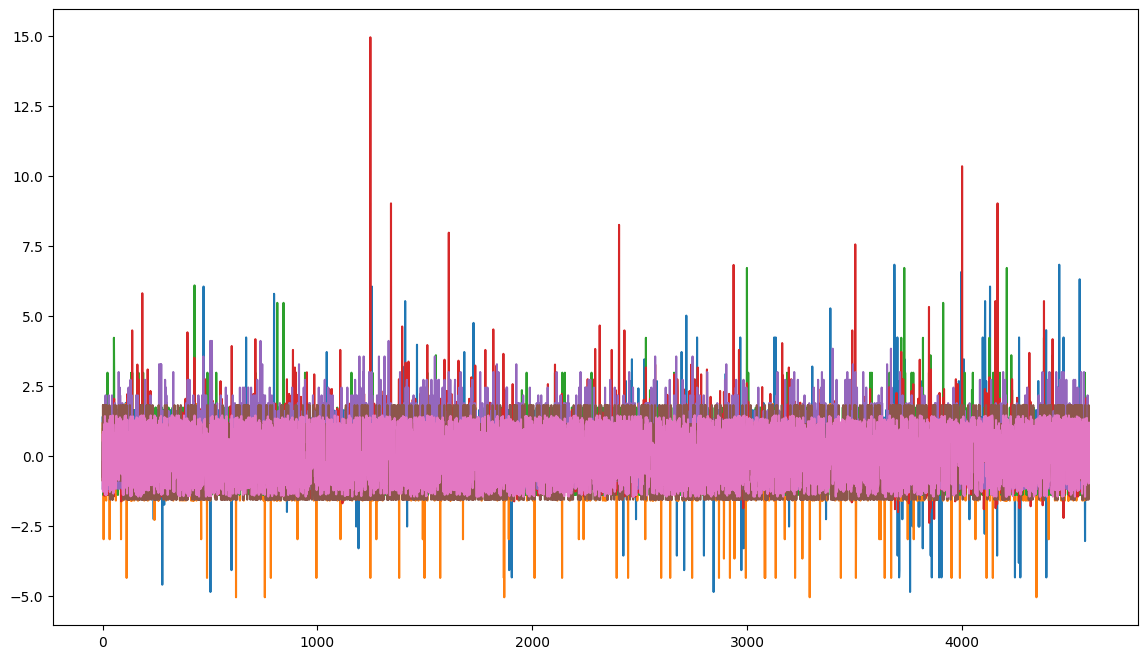

In [7]:
plt.figure(figsize=(14, 8))
scaler = StandardScaler().fit(encoded_df)
standardized_X = scaler.transform(encoded_df)
plt.plot(standardized_X)
plt.show()

## See the distribution of categorical variables

In [8]:
df["Վերանորոգում"].unique()

array(['Կապիտալ', 'Զրոյական վիճակ', 'Պետական վիճակ', 'Նորմալ վիճակ',
       'Կոսմետիկ', 'Դիզայներական'], dtype=object)

In [12]:
df["Վերանորոգում"].value_counts()

Վերանորոգում
Կապիտալ           1925
Նորմալ վիճակ       797
Դիզայներական       745
Կոսմետիկ           441
Պետական վիճակ      405
Զրոյական վիճակ     277
Name: count, dtype: int64

## Dataset Summary Statistics

In [10]:
price_list = []
for i in df['Գինը']:
  if i[0] == "$":
    price_list.append(i[1:])

In [11]:
price_list_float = [float(price.replace(',', '')) for price in price_list]

mean_price = sum(price_list_float) / len(price_list_float)

print("Mean price:", mean_price)


Mean price: 139092.01457275337


# 4.Data Analysis (Exploratory Data Analysis (EDA)):

Text(0.5, 1.0, 'Rooms')

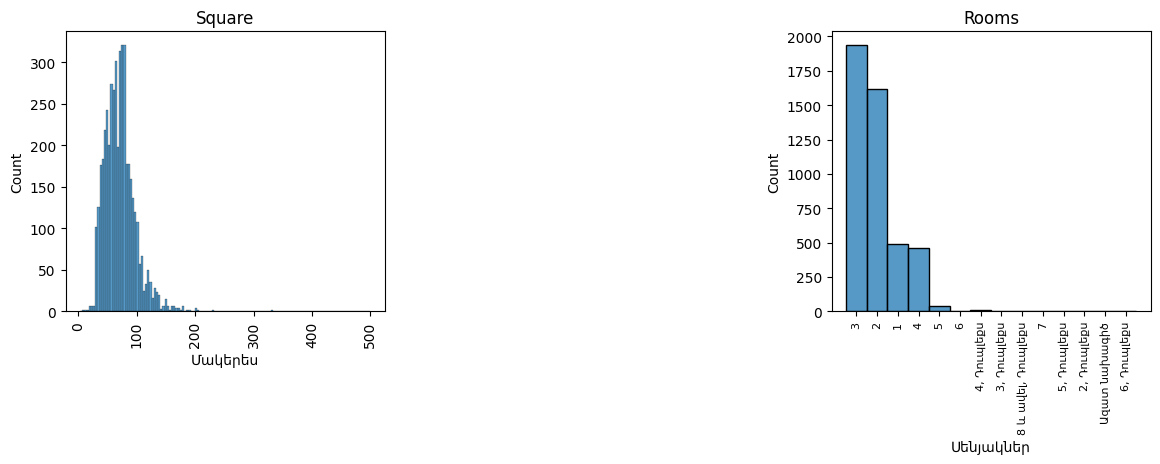

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Մակերես'])
plt.xticks(rotation = 90)
plt.title("Square")
plt.subplot(2, 3, 3)
sns.histplot(df['Սենյակներ'])
plt.xticks(rotation = 90, fontsize = 8)
plt.title("Rooms")

Text(0.5, 1.0, 'Building type')

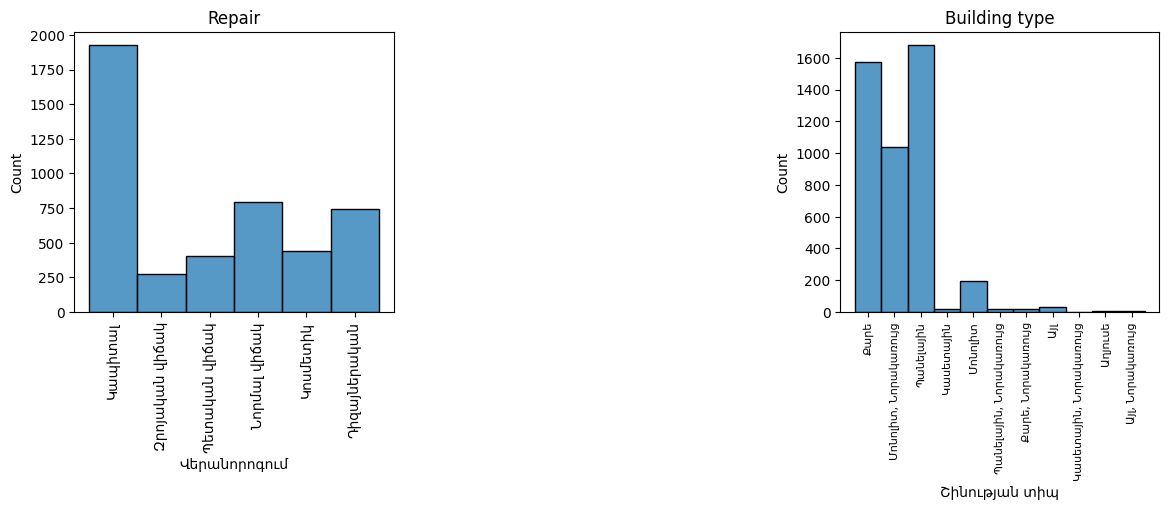

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Վերանորոգում'])
plt.xticks(rotation = 90)
plt.title("Repair")
plt.subplot(2, 3, 3)
sns.histplot(df['Շինության տիպ'])
plt.xticks(rotation = 90, fontsize = 8)
plt.title("Building type")

## Correlation of Analysis


In [15]:
df_corr = encoded_df.corr(numeric_only=True)
df_corr

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը
Տարածաշրջան,1.000000,-0.001042,0.012584,-0.039929,-0.102291,0.052299,0.126847
Շինության տիպ,-0.001042,1.000000,-0.044311,-0.131227,-0.358887,0.218664,0.037918
Սենյակներ,0.012584,-0.044311,1.000000,0.722006,0.065548,-0.108837,-0.192606
Մակերես,-0.039929,-0.131227,0.722006,1.000000,0.141968,-0.131373,-0.165409
Հարկ,-0.102291,-0.358887,0.065548,0.141968,1.000000,-0.148186,-0.056467
Վերանորոգում,0.052299,0.218664,-0.108837,-0.131373,-0.148186,1.000000,0.175504
Գինը,0.126847,0.037918,-0.192606,-0.165409,-0.056467,0.175504,1.000000


<Axes: >

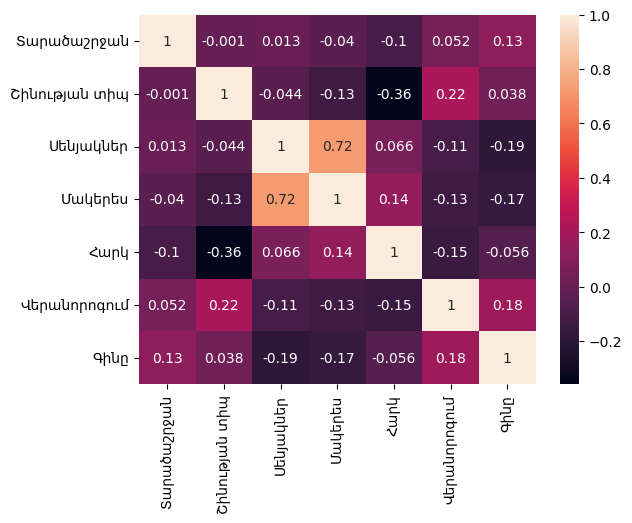

In [16]:
sns.heatmap(df_corr, annot=True)

In [17]:
encoded_df.describe()

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը
count,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000
mean,18.733115,7.320261,2.243791,71.689978,5.235076,2.323094,260.269717
std,3.850725,1.448409,1.603833,28.663541,3.600421,1.480008,176.353831
min,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,16.000000,6.000000,1.000000,53.000000,3.000000,2.000000,87.000000
50%,19.000000,7.000000,3.000000,69.000000,4.000000,2.000000,238.000000
75%,21.000000,9.000000,3.000000,84.000000,7.000000,4.000000,440.000000
max,45.000000,10.000000,13.000000,500.000000,20.000000,5.000000,514.000000


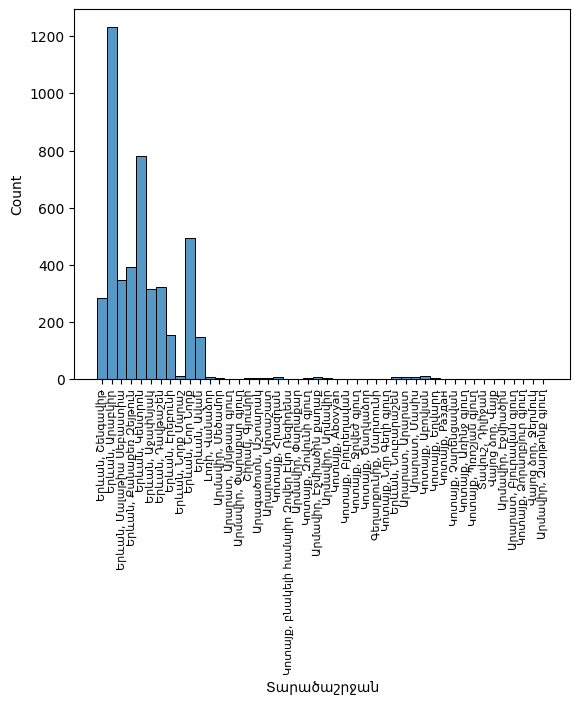

In [18]:
# Your plot code
sns.histplot(df['Տարածաշրջան'])
plt.xticks(rotation=90)

# Change the size of the x-label text
plt.tick_params(axis='x', labelsize=8)  # Change 12 to your desired font size

plt.show()


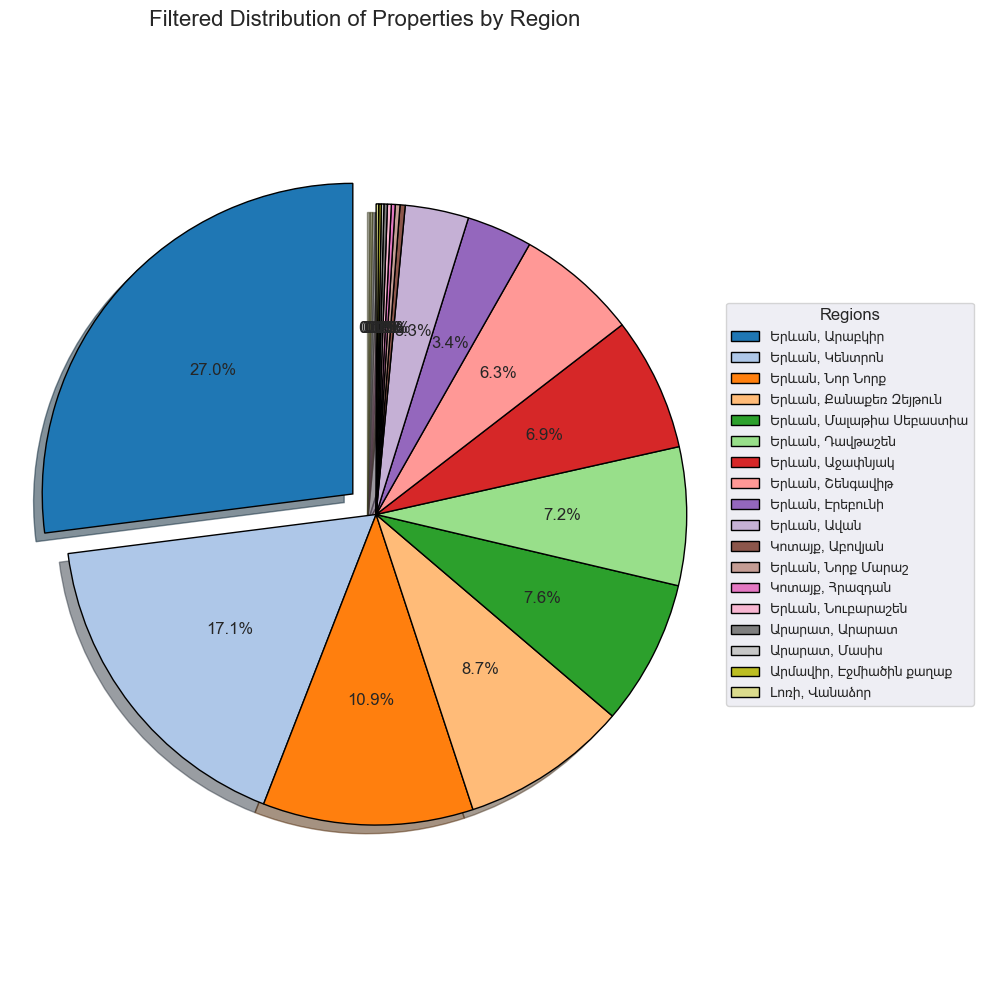

In [40]:
region_counts = df_cleaned['Տարածաշրջան'].value_counts()

threshold = 5
filtered_region_counts = region_counts[region_counts > threshold]

colors = plt.get_cmap('tab20').colors

plt.figure(figsize=(10, 10))
explode = [0.1 if i == filtered_region_counts.idxmax() else 0 for i in filtered_region_counts.index]
wedges, _, autotexts = plt.pie(filtered_region_counts, autopct='%1.1f%%', startangle=90, explode=explode,
                               shadow=True, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.legend(wedges, filtered_region_counts.index, title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

plt.title('Filtered Distribution of Properties by Region', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

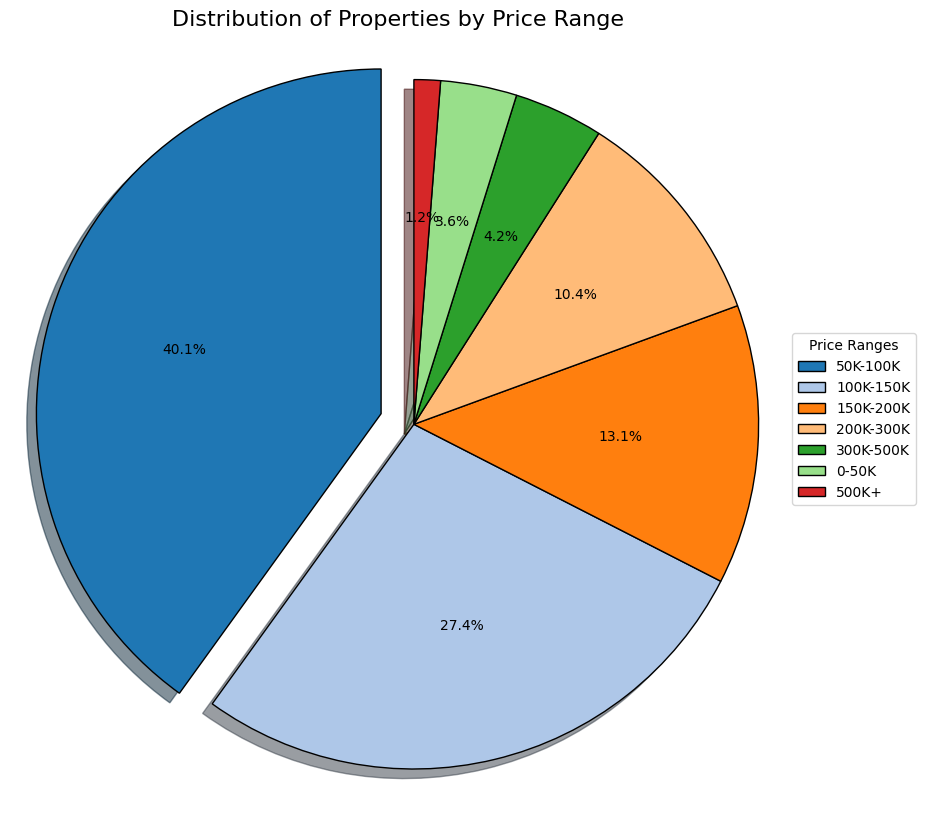

In [21]:
df["Գինը_clean"] = pd.to_numeric(df["Գինը"].str.replace('$', '').str.replace(',', ''), errors='coerce')

bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, float('inf')]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '300K-500K', '500K+']
df['Price_Range'] = pd.cut(df['Գինը_clean'], bins=bins, labels=labels)

price_range_counts = df['Price_Range'].value_counts()

plt.figure(figsize=(10, 10))
explode = [0.1 if i == price_range_counts.idxmax() else 0 for i in price_range_counts.index]
wedges, _, autotexts = plt.pie(price_range_counts, autopct='%1.1f%%', startangle=90, explode=explode,
                               shadow=True, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.legend(wedges, price_range_counts.index, title="Price Ranges", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

plt.title('Distribution of Properties by Price Range', fontsize=16)
plt.axis('equal')
plt.show()


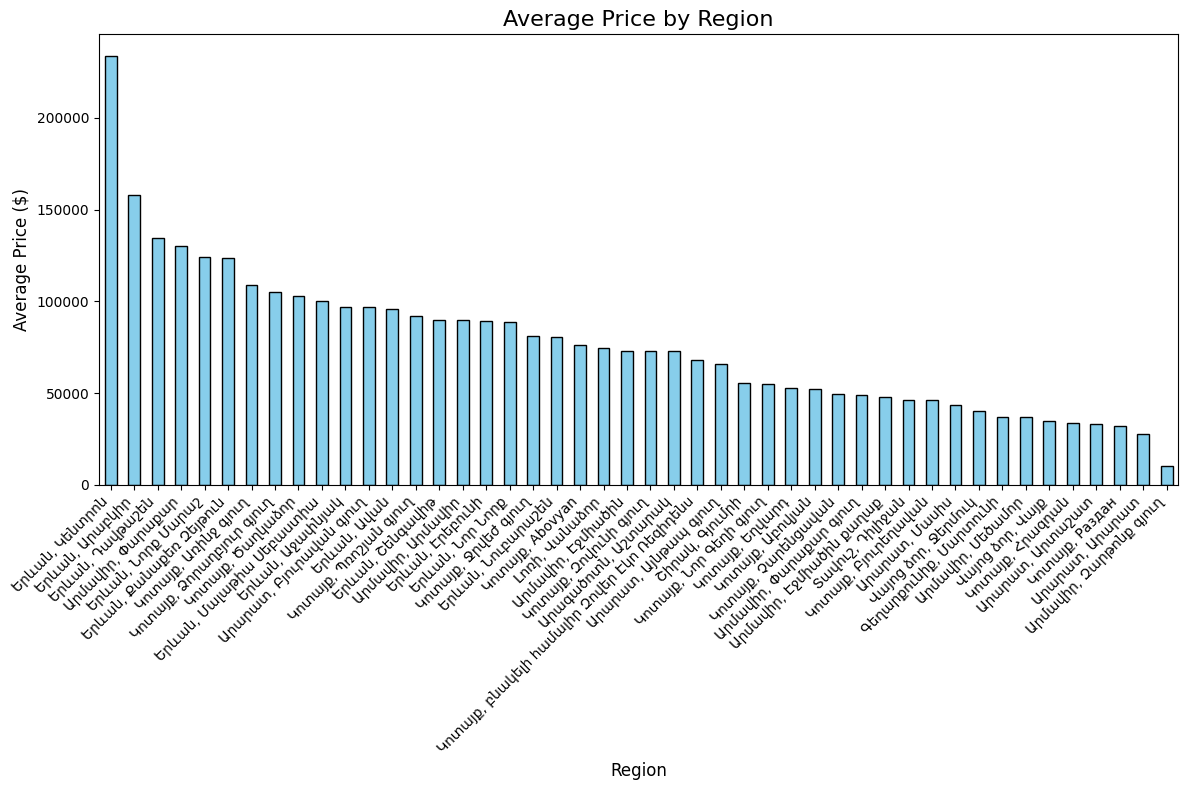

In [22]:
df["Գինը_clean"] = pd.to_numeric(df["Գինը"].str.replace('$', '').str.replace(',', ''), errors='coerce')

region_price_avg = df.groupby("Տարածաշրջան")["Գինը_clean"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
region_price_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Region', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


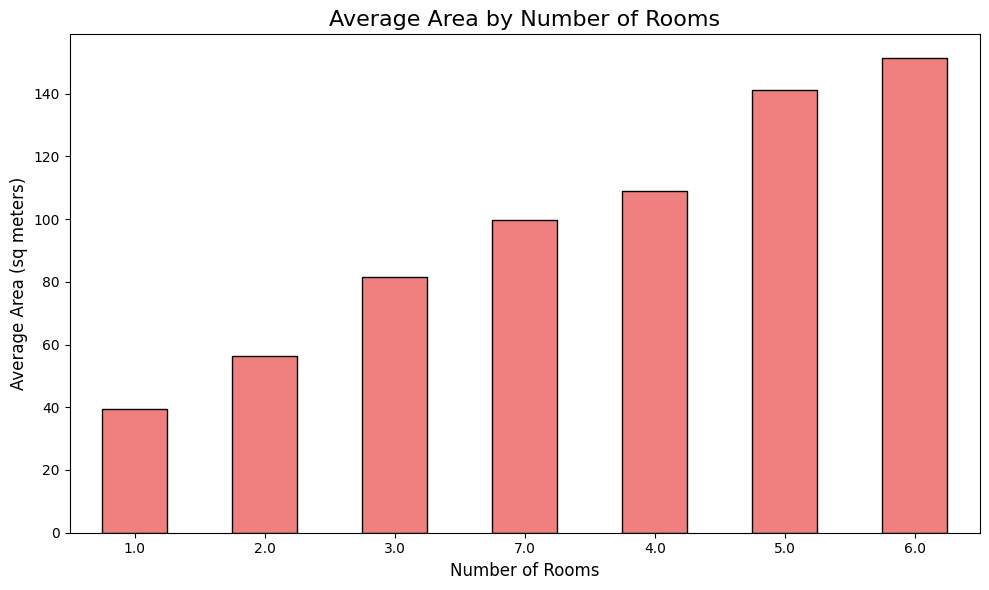

In [23]:
df["Մակերես_clean"] = pd.to_numeric(df["Մակերես"], errors='coerce')
df["Սենյակներ_clean"] = pd.to_numeric(df["Սենյակներ"], errors='coerce')

rooms_area_avg = df.groupby("Սենյակներ_clean")["Մակերես_clean"].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
rooms_area_avg.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Area by Number of Rooms', fontsize=16)
plt.ylabel('Average Area (sq meters)', fontsize=12)
plt.xlabel('Number of Rooms', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

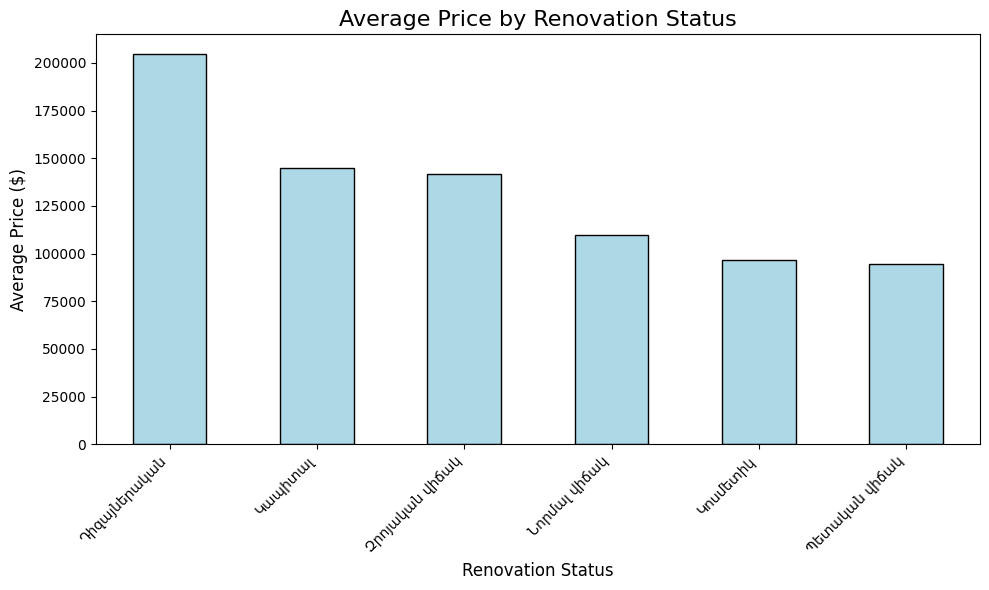

In [24]:
df["Գինը_clean"] = pd.to_numeric(df["Գինը"].str.replace('$', '').str.replace(',', ''), errors='coerce')

renovation_price_avg = df.groupby("Վերանորոգում")["Գինը_clean"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
renovation_price_avg.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Price by Renovation Status', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Renovation Status', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

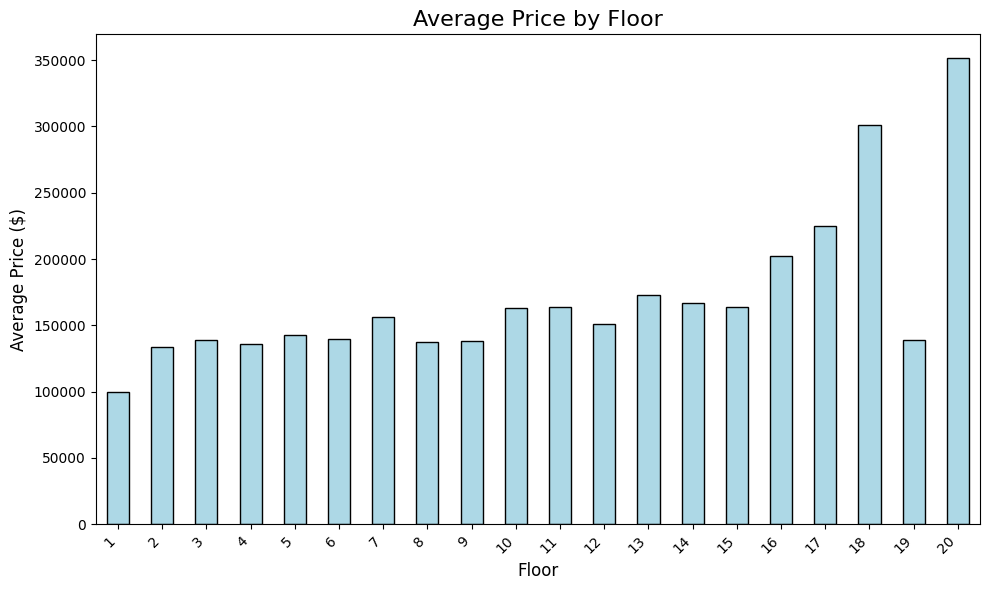

In [25]:
df["Գինը_clean"] = pd.to_numeric(df["Գինը"].str.replace('$', '').str.replace(',', ''), errors='coerce')

df["Հարկ"] = pd.to_numeric(df["Հարկ"], errors='coerce')
renovation_price_avg = df.groupby("Հարկ")["Գինը_clean"].mean().sort_index(ascending=True)

plt.figure(figsize=(10, 6))
renovation_price_avg.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Price by Floor', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Floor', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

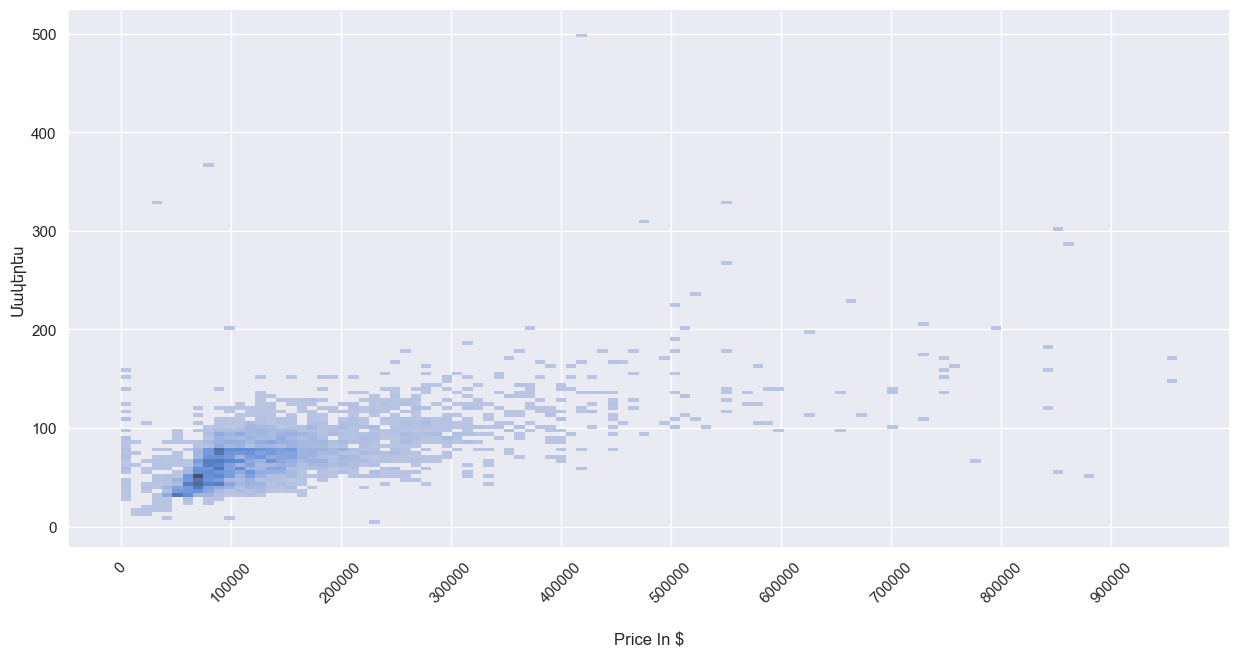

In [26]:
sns.color_palette("tab10")
sns.set(style="darkgrid")

plt.figure(figsize=[15,7])
sns.histplot(data=df, x="Գինը_clean", y='Մակերես')

plt.xticks(rotation=45)
plt.xticks(range(0, 1000000, 100000))
plt.xlabel("Price In $", labelpad=20)
plt.tick_params(which='major', pad=2)

plt.show()


In [27]:
df[(df['Մակերես'] < 100) & (df['Գինը_clean'] > 2.5 * 200000)]

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը,Գինը_clean,Price_Range,Մակերես_clean,Սենյակներ_clean
1524,"Երևան, Կենտրոն","Մոնոլիտ, Նորակառույց",3,99,8,Կապիտալ,$594000,594000.0,500K+,99,3.0
3841,"Երևան, Էրեբունի",Պանելային,2,66,7,Նորմալ վիճակ,$778000,778000.0,500K+,66,2.0
4260,"Երևան, Արաբկիր",Պանելային,3,98,4,Կապիտալ,$650000,650000.0,500K+,98,3.0
4322,"Երևան, Կենտրոն",Քարե,1,50,1,Կապիտալ,$880000,880000.0,500K+,50,1.0
4357,"Երևան, Նոր Նորք","Մոնոլիտ, Նորակառույց",2,54,5,Դիզայներական,$850000,850000.0,500K+,54,2.0


In [28]:
df[(df['Մակերես'] > 400) ]

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը,Գինը_clean,Price_Range,Մակերես_clean,Սենյակներ_clean
1246,"Երևան, Կենտրոն",Այլ,5,500,1,Կոսմետիկ,$420000,420000.0,300K-500K,500,5.0


In [29]:
df[(df['Մակերես'] > 100) & (df['Գինը_clean'] > 900000)]

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը,Գինը_clean,Price_Range,Մակերես_clean,Սենյակներ_clean
2998,"Երևան, Կենտրոն","Մոնոլիտ, Նորակառույց",Ազատ նախագիծ,146,4,Դիզայներական,$960000,960000.0,500K+,146,NaN
3802,"Երևան, Կենտրոն","Մոնոլիտ, Նորակառույց",4,170,5,Կապիտալ,$960000,960000.0,500K+,170,4.0


In [30]:
df[df['Գինը_clean'] <= 1000]

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը,Գինը_clean,Price_Range,Մակերես_clean,Սենյակներ_clean
4,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,85,6,Պետական վիճակ,$386,386.0,0-50K,85,3.0
418,"Երևան, Արաբկիր",Մոնոլիտ,2,60,7,Կապիտալ,$850,850.0,0-50K,60,2.0
873,"Երևան, Շենգավիթ",Պանելային,2,63,6,Կոսմետիկ,$542,542.0,0-50K,63,2.0
989,"Երևան, Կենտրոն",Քարե,3,98,4,Կապիտալ,$903,903.0,0-50K,98,3.0
1481,"Երևան, Նոր Նորք",Պանելային,3,110,9,Կապիտալ,$125,125.0,0-50K,110,3.0
1700,"Երևան, Նոր Նորք","Մոնոլիտ, Նորակառույց",2,35,3,Կապիտալ,$206,206.0,0-50K,35,2.0
1771,"Երևան, Դավթաշեն","Մոնոլիտ, Նորակառույց",2,70,3,Կապիտալ,$645,645.0,0-50K,70,2.0
1899,"Երևան, Մալաթիա Սեբաստիա",Քարե,2,60,2,Դիզայներական,$902,902.0,0-50K,60,2.0
2312,"Երևան, Արաբկիր",Քարե,1,38,4,Կապիտալ,$451,451.0,0-50K,38,1.0
2381,"Երևան, Շենգավիթ",Քարե,2,48,5,Դիզայներական,$567,567.0,0-50K,48,2.0


# 5. Using ML algorithm
for this section was performed a different data processing methodology 

In [33]:
data = pd.read_csv("final_DataBase.csv")
data.head()

,Տարածաշրջան,Շինության տիպ,Սենյակներ,Մակերես,Հարկ,Վերանորոգում,Գինը
0,"Երևան, Շենգավիթ",Քարե,3,50,1,Կապիտալ,$64000
1,"Երևան, Արաբկիր","Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,$150000
2,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,100,7,Պետական վիճակ,$115000
3,"Երևան, Մալաթիա Սեբաստիա",Պանելային,1,45,1,Կապիտալ,$67000
4,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,85,6,Պետական վիճակ,$386


In [34]:
data.columns = ["Location", "Building Type", "Rooms", "Area", "Floor", "Repairt Status", "PriceInDollars"]
data.head()

,Location,Building Type,Rooms,Area,Floor,Repairt Status,PriceInDollars
0,"Երևան, Շենգավիթ",Քարե,3,50,1,Կապիտալ,$64000
1,"Երևան, Արաբկիր","Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,$150000
2,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,100,7,Պետական վիճակ,$115000
3,"Երևան, Մալաթիա Սեբաստիա",Պանելային,1,45,1,Կապիտալ,$67000
4,"Երևան, Մալաթիա Սեբաստիա",Պանելային,3,85,6,Պետական վիճակ,$386


In [35]:
location = data.Location.str.split(',', expand=True)
data['City'] = location[0]
data['District'] = location[1]
del data['Location']
data.head()

,Building Type,Rooms,Area,Floor,Repairt Status,PriceInDollars,City,District
0,Քարե,3,50,1,Կապիտալ,$64000,Երևան,Շենգավիթ
1,"Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,$150000,Երևան,Արաբկիր
2,Պանելային,3,100,7,Պետական վիճակ,$115000,Երևան,Մալաթիա Սեբաստիա
3,Պանելային,1,45,1,Կապիտալ,$67000,Երևան,Մալաթիա Սեբաստիա
4,Պանելային,3,85,6,Պետական վիճակ,$386,Երևան,Մալաթիա Սեբաստիա


In [36]:
def format_price(value: str) -> int:
  if isinstance(value, (float, int)):
    return value
  if value.startswith("$"):
    return int(value[1:])
  try:
    return int(value)
  except (ValueError, TypeError) as te:
    return None

In [37]:
print(f"Number of rows with Nan: {sum(data.isna().sum())}")
print(len(data))
data.dropna(inplace=True)
print(f"Number of rows with Nan: {sum(data.isna().sum())}")
print(len(data))

Number of rows with Nan: 0
4590
Number of rows with Nan: 0
4590


In [38]:
data['PriceInDollars'] = data['PriceInDollars'].apply(format_price)
data.head()

,Building Type,Rooms,Area,Floor,Repairt Status,PriceInDollars,City,District
0,Քարե,3,50,1,Կապիտալ,64000.0,Երևան,Շենգավիթ
1,"Մոնոլիտ, Նորակառույց",2,70,3,Զրոյական վիճակ,150000.0,Երևան,Արաբկիր
2,Պանելային,3,100,7,Պետական վիճակ,115000.0,Երևան,Մալաթիա Սեբաստիա
3,Պանելային,1,45,1,Կապիտալ,67000.0,Երևան,Մալաթիա Սեբաստիա
4,Պանելային,3,85,6,Պետական վիճակ,386.0,Երևան,Մալաթիա Սեբաստիա


## out of professional interest, I did the encoding by hand


In [43]:
def encoded_data():
    
    data["City"] = data["City"].replace({
        'Երևան': 1,
        'Լոռի': 2,
        'Արմավիր': 3,
        'Արարատ': 4,
        'Շիրակ': 5,
        'Արագածոտն': 6,
        'Կոտայք': 7,
        'Գեղարքունիք': 8,
        'Տավուշ': 9,
        'Վայոց ձոր': 10
    })
    
    data["Building Type"] = data["Building Type"].replace({
        'Պանելային': 1,
        'Քարե': 2,
        'Մոնոլիտ, Նորակառույց': 3,
        'Մոնոլիտ': 4,
        'Այլ': 5,
        'Կասետային': 6,
        'Պանելային, Նորակառույց': 7,
        'Քարե, Նորակառույց': 8,
        'Աղյուսե': 9,
        'Այլ, Նորակառույց': 10,
        'Կասետային, Նորակառույց': 11
    
    })
    
    data["Repairt Status"] = data["Repairt Status"].replace({
        'Կապիտալ': 1,
        'Նորմալ վիճակ': 2,
        'Դիզայներական': 3,
        'Կոսմետիկ': 4,
        'Պետական վիճակ': 5,
        'Զրոյական վիճակ': 6
    }) 
    
    data["Rooms"] = data["Rooms"].replace({        
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '4, Դուպլեքս': 8,
        '3, Դուպլեքս': 9,
        '2, Դուպլեքս': 10,
        '5, Դուպլեքս': 11,
        'Ազատ նախագիծ': 12,
        '8 և ավել, Դուպլեքս': 13,
        '6, Դուպլեքս': 14
    })
    
    data["District"] = data["District"].replace({
        ' Արաբկիր': 1,
        ' Կենտրոն': 2,
        ' Նոր Նորք': 3,
        ' Քանաքեռ Զեյթուն': 4,
        ' Մալաթիա Սեբաստիա': 5,
        ' Դավթաշեն': 6,
        ' Աջափնյակ': 7,
        ' Շենգավիթ': 8,
        ' Էրեբունի': 9,
        ' Ավան': 10,
        ' Աբովյան': 11,
        ' Abovyan': 11,
        ' Նորք Մարաշ': 12,
        ' Նուբարաշեն': 13,
        ' Հրազդան': 14,
        ' Раздан' : 14,
        ' Արարատ' : 15,
        ' Վանաձոր' : 16,
        ' Մասիս' : 17,
        ' Էջմիածին քաղաք' : 18,
        ' Արտաշատ' : 19,
        ' Եղվարդ' : 20,
        ' Մեծամոր' : 21,
        ' Զովունի գյուղ' : 22,
        ' Արմավիր' : 23,
        ' Աշտարակ' : 24,
        ' Գյումրի' : 25,
        ' Բյուրեղավան' : 26,
        ' Ջրվեժ գյուղ' : 27,
        ' Դիլիջան' : 28,
        ' Չարենցավան' : 29,
        ' Չարենցավան' : 30,
        ' Փարաքար' : 31,
        ' Առինջ գյուղ' : 32,
        ' Ջերմուկ' : 33,
        ' Ձորաղբյուր գյուղ' : 34,
        ' Բյուրավան գյուղ' : 35,
        ' Էջմիածին' : 36,
        ' Վայք' : 37,
        ' Պռոշյան գյուղ' : 38,
        ' Այնթապ գյուղ' : 39,
        ' Փարաքար գյուղ' : 40,
        ' բնակելի համալիր Զովեր Էկո Ռեզիդենս' : 41,
        ' Նոր Գեղի գյուղ' : 42,
        ' Մարտունի' : 43,
        ' Ծաղկաձոր' : 44,
        ' Զարթոնք գյուղ' : 45
    })
    return data.head()
encoded_data = encoded_data()
encoded_data

,Building Type,Rooms,Area,Floor,Repairt Status,PriceInDollars,City,District
0,2,3,50,1,1,64000.0,1,8
1,3,2,70,3,6,150000.0,1,1
2,1,3,100,7,5,115000.0,1,5
3,1,1,45,1,1,67000.0,1,5
4,1,3,85,6,5,386.0,1,5


In [44]:
X = encoded_data[['Building Type', 'Rooms', 'Area', 'Floor', 'Repairt Status', 'City', 'District']]  # Ընտրեք ձեր մուտքային սյունակները
y = encoded_data['PriceInDollars']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle = True,
                                                    random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = RandomForestRegressor()
model

RandomForestRegressor()

In [49]:
hyper_param = {
    'n_estimators': [100, 150],
    'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'min_samples_split': [2, 5],
}

In [50]:
full_model = GridSearchCV(model, hyper_param, cv=3, verbose=2)

In [55]:
full_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END criterion=squared_error, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END criterion=squared_error, min_samples_split=5, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=squared_error, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=absolute_error, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=friedman_mse, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END criterion=poisson, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=poisson, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END criterion=poisson, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=5, n_estimators=100; total time=   0.3s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=poisson, min_samples_split=5, n_estimators=150; total time=   0.4s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END criterion=poisson, min_samples_split=5, n_estimators=150; total time=   0.5s


C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Paruyr\Desktop\New folder\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[CV] END criterion=poisson, min_samples_split=5, n_estimators=150; total time=   0.4s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             verbose=2)

In [52]:
y_pred = full_model.predict(X_test)
mean_absolute_error(y_pred, y_test)

102799.45999999999

In [53]:
np.sqrt(mean_squared_error(y_pred, y_test))

np.float64(102799.45999999999)

In [54]:
y_pred

array([47200.54])